# Lab4

## Homework

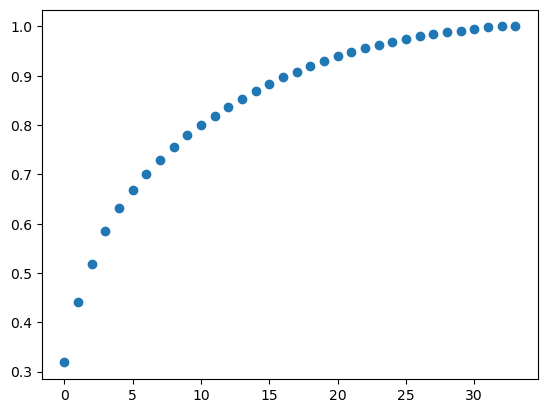

Transformer: PCA | Scaler: None | Classifier: kNN
[[17  8]
 [ 0 46]]
0.8873239436619719


Transformer: PCA | Scaler: None | Classifier: SVC
[[21  4]
 [ 1 45]]
0.9295774647887324


Transformer: PCA | Scaler: None | Classifier: DT
[[21  4]
 [ 5 41]]
0.8732394366197183


Transformer: PCA | Scaler: None | Classifier: Random Forest
[[23  2]
 [ 0 46]]
0.971830985915493


Transformer: PCA | Scaler: Standard | Classifier: kNN
[[13 12]
 [ 1 45]]
0.8169014084507042


Transformer: PCA | Scaler: Standard | Classifier: SVC
[[23  2]
 [ 0 46]]
0.971830985915493


Transformer: PCA | Scaler: Standard | Classifier: DT
[[22  3]
 [ 5 41]]
0.8873239436619719


Transformer: PCA | Scaler: Standard | Classifier: Random Forest
[[23  2]
 [ 0 46]]
0.971830985915493


Transformer: PCA | Scaler: MinMax | Classifier: kNN
[[16  9]
 [ 1 45]]
0.8591549295774648


Transformer: PCA | Scaler: MinMax | Classifier: SVC
[[22  3]
 [ 0 46]]
0.9577464788732394


Transformer: PCA | Scaler: MinMax | Classifier: DT
[[20  5]
 [ 5 

In [2]:
#%% Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import FastICA, PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

#%% Read, manipulate and split data
data_frame = pd.read_csv('ionosphere_data.csv', header=None)
data_frame.columns = ["C" + str(i) for i in range(36)]
data_frame.drop("C0",axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data_frame.iloc[:,:-1], data_frame.iloc[:,-1], test_size=0.2,shuffle=True)
#%% PCA calculations
pca_transform=PCA()
pca_transform.fit(X_train)
variances = pca_transform.explained_variance_ratio_
cumulated_variances = variances.cumsum()    #Based on visual inspection of variable, to clarify 95% or more variance PCA needs 23 elements...
plt.scatter(np.arange(variances.shape[0]),cumulated_variances)
plt.show()  

PCA_num = (cumulated_variances<0.95).sum()+1 #... and it matches calculated result. 

#Let's compare to PCA calculations
pca95 = PCA(n_components=0.95)
pca95.fit(X_train)
PCA_internal_number = pca95.n_components_ #Also matches result!
# %% Train and test models "in bulk"
transformers = [("PCA",PCA(PCA_num)), ("FastICA",FastICA(PCA_num,random_state=2022))]    #I used tuple here to automate making all combinations with nice console output
scalers = [("None",None), ("Standard",StandardScaler()), ("MinMax",MinMaxScaler()),("Robust",RobustScaler())] #First element: name, second: object
classifiers = [("kNN",kNN(weights='distance')), ("SVC",SVC()),("DT",DT(max_depth=5)), ("Random Forest",RandomForest(max_depth=5))]

best_accuracy_score = 0
best_combination = ""
for transformer in transformers:    #Test for every suggested combination
    for scaler in scalers:               
        for classifier in classifiers:
            pipe = None
            tr_name, tr = transformer
            sc_name, sc = scaler
            cl_name, cl = classifier
            
            if(scaler == None):
                pipe = Pipeline([
                    ['transformer',tr],
                    ['classifier',cl]
                    ])
            else:
                pipe = Pipeline([
                    ['transformer',tr],
                    ['scaler',sc],
                    ['classifier',cl]
                    ])
            pipe.fit(X_train,y_train)
            y_pred = pipe.predict(X_test)
            currentScore = accuracy_score(y_test,y_pred)
            if(currentScore > best_accuracy_score):
                best_accuracy_score = currentScore
                best_combination = "Transformer: {} | Scaler: {} | Classifier: {}".format(tr_name,sc_name,cl_name)
                
            print("Transformer: {} | Scaler: {} | Classifier: {}".format(tr_name,sc_name,cl_name));
            print(confusion_matrix(y_test, y_pred))
            print(accuracy_score(y_test,y_pred))
            print('\n')
print("Najlepsza kombinacja [{}] z dokładnoscią: {}".format(best_combination,best_accuracy_score))